In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb

In [3]:
base = pd.read_csv('Prime Tv Shows.csv')
print(base)

     S.no.                            Name of the show  Year of release  \
0        1                                  Pataal Lok             2020   
1        2                                      Upload             2020   
2        3                   The Marvelous Mrs. Maisel             2017   
3        4                      Four More Shots Please             2019   
4        5                                     Fleabag             2016   
..     ...                                         ...              ...   
388    389                        Chris Tall Presents…             2019   
389    390                               Short Poppies             2014   
390    391  The 2018 Rose Parade Hosted by Cord & Tish             2018   
391    392                 Aliens Love Underpants And…             2017   
392    393             Gina Brillon: The Floor is Lava             2020   

     No of seasons available Language          Genre  IMDb rating  \
0                          1  

In [7]:
base.head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+


In [52]:
base_variables=base.drop(["Name of the show","Language","IMDb rating","Genre","Age of viewers"], axis=1)


In [53]:
print (base_variables)

     S.no.  Year of release  No of seasons available
0        1             2020                        1
1        2             2020                        1
2        3             2017                        3
3        4             2019                        2
4        5             2016                        2
..     ...              ...                      ...
388    389             2019                        1
389    390             2014                        1
390    391             2018                        1
391    392             2017                        1
392    393             2020                        1

[393 rows x 3 columns]


In [54]:
base_variables.describe()

,S.no.,Year of release,No of seasons available
count,393.000000,393.000000,393.000000
mean,197.000000,2011.274809,2.608142
std,113.593574,12.943787,2.592008
min,1.000000,1926.000000,1.000000
25%,99.000000,2011.000000,1.000000
50%,197.000000,2016.000000,2.000000
75%,295.000000,2018.000000,3.000000
max,393.000000,2020.000000,20.000000


## Normalizamos los valores de las caracteristicas

In [55]:
base_norm=(base_variables-base_variables.min())/(base_variables.max()-base_variables.min())
base_norm

,S.no.,Year of release,No of seasons available
0,0.000000,1.000000,0.000000
1,0.002551,1.000000,0.000000
2,0.005102,0.968085,0.105263
3,0.007653,0.989362,0.052632
4,0.010204,0.957447,0.052632
...,...,...,...
388,0.989796,0.989362,0.000000
389,0.992347,0.936170,0.000000
390,0.994898,0.978723,0.000000
391,0.997449,0.968085,0.000000


In [56]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(base_norm)
    wcss.append(kmeans.inertia_)

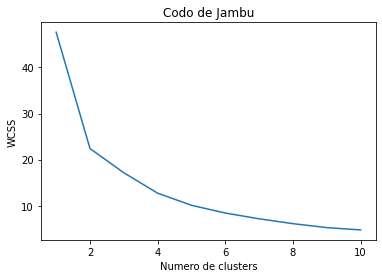

In [57]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS")
plt.show()

In [58]:
clustering = KMeans (n_clusters=3, max_iter=300)
clustering.fit(base_norm)

KMeans(n_clusters=3)

In [59]:
base["KMeans_Clusters"] = clustering.labels_
base.head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers,KMeans_Clusters
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+,0
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+,0
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+,0
3,4,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+,0
4,5,Fleabag,2016,2,English,Comedy,8.7,18+,0


In [61]:
pca = PCA (n_components=2)
pca_base=pca.fit_transform(base_norm)
pca_base_df=pd.DataFrame(data=pca_base, columns= ["Componente_1", "Componente_2"])
pca_nombres_base = pd.concat([pca_base_df, base[["KMeans_Clusters"]]], axis=1)
pca_nombres_base

,Componente_1,Componente_2,KMeans_Clusters
0,-0.493135,-0.134564,0
1,-0.490608,-0.134518,0
2,-0.497343,-0.039848,0
3,-0.490601,-0.091036,0
4,-0.485577,-0.067462,0
...,...,...,...
388,0.488244,-0.108968,1
389,0.494933,-0.069709,1
390,0.494131,-0.101034,1
391,0.497490,-0.093145,1


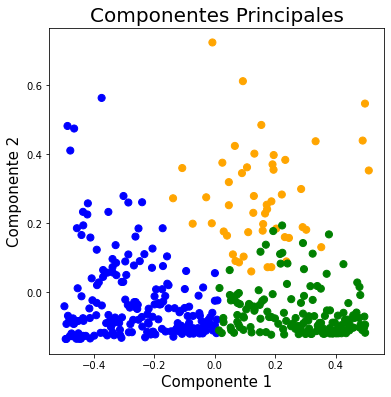

In [64]:
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1", fontsize=15)
ax.set_ylabel("Componente 2", fontsize=15)
ax.set_title("Componentes Principales", fontsize=20)

color_theme = np.array(["blue","green","orange"])
ax.scatter(x=pca_nombres_base.Componente_1, y = pca_nombres_base.Componente_2,
          c=color_theme[pca_nombres_base.KMeans_Clusters], s=50)
plt.show()